<a href="https://colab.research.google.com/github/Aashi999/FC/blob/main/Ensemble_Project_Cyber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split

%matplotlib inline

#NLTK package for NLP
!pip install nltk

#import the nltk package
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize,sent_tokenize

#Packages for data cleaning
!pip install contractions
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import download as nltk_download
import random
import contractions
import numpy as np
import re

In [20]:
data = pd.read_csv("/content/drive/MyDrive/Ensemble Learning_CyberBullies/cyberbullying_tweets.csv")

In [21]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying


In [ ]:
#Shall we do text cleaning before or after feature extraction?


#Text Cleaning

In [22]:
# downloading stopwords list
nltk_download('stopwords')
stop = stopwords.words('english')

#ADJUSTING DATA FORMAT

#Putting all tweets in a lower case format
data['tweet_text_clean'] = data['tweet_text'].str.lower()

#Removing numbers and punctuations
data['tweet_text_clean'] = data['tweet_text_clean'].apply(lambda x: re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', x))
data['tweet_text_clean'] = data['tweet_text_clean'].apply(lambda x: re.sub(r'[[]]', ' ', x))

#Removing the contractions
data['tweet_text_clean'] = data['tweet_text_clean'].apply(lambda x: contractions.fix(x))


#Replacing stop words
pat = r'\b(?:{})\b'.format('|'.join(stop))
data['tweet_text_clean'] = data['tweet_text_clean'].str.replace(pat, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
data.head()

,tweet_text,cyberbullying_type,tweet_text_clean
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,words kata da dre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying,aussietv white mkr theblock imacelebrityau today su rise studio eighbours wo derla dte etc
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,xochitlsuckkks classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying,jaso _gio meh. p tha ks heads ot co cer ed gry dude twitter.
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying,rudhoee glish isis accou prete di g kurdish accou . like islam lies.


In [25]:
#Lemmatize the sentence

def lemmatizeSentence(sentence):
    lemmatizer = WordNetLemmatizer()
    token_words=word_tokenize(sentence) 
#we need to tokenize the sentence or else lemmatizing will return the entire sentence as is.
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word,pos="v"))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

In [26]:
data['tweet_text_clean'] = data['tweet_text_clean'].apply(lambda x: lemmatizeSentence(x))

#Data Exploration and visualisation

Exploring words and patterns associated with each type of cyberbullying.

In [16]:
data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

(-0.5, 999.5, 499.5, -0.5)

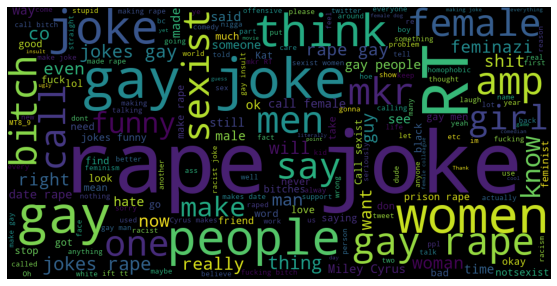

In [17]:
#EDA for the gender

gender = data[data['cyberbullying_type']=='gender']
text_gender = gender.tweet_text.values
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(text_gender))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [48]:
#Bigrams - can be a good feature in model

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_gram(corpus,ngram_range,n=None):
    vector = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    words = vector.transform(corpus)
    freq_words = words.sum(axis=0) 
    words_freq = [(word, freq_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

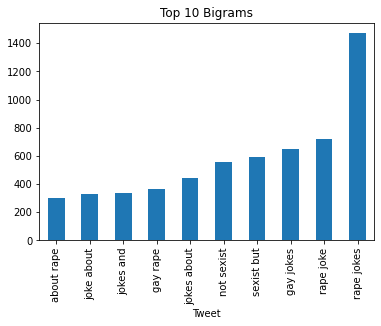

In [49]:
bigrams = top_n_gram(text_gender,(2,2),10)

gender2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
gender2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

(-0.5, 999.5, 499.5, -0.5)

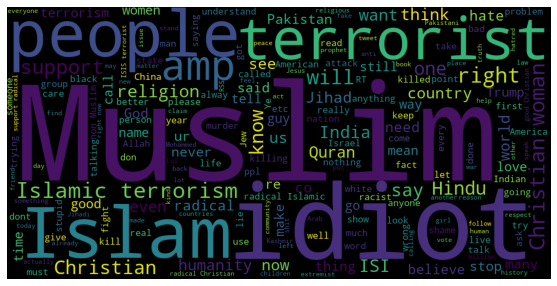

In [38]:
#EDA for the religion

religion = data[data['cyberbullying_type']=='religion']
text_religion = religion.tweet_text.values
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(text_religion))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

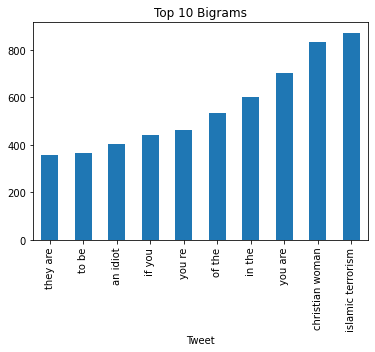

In [50]:

bigrams = top_n_gram(text_religion,(2,2),10)

religion2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
religion2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

(-0.5, 999.5, 499.5, -0.5)

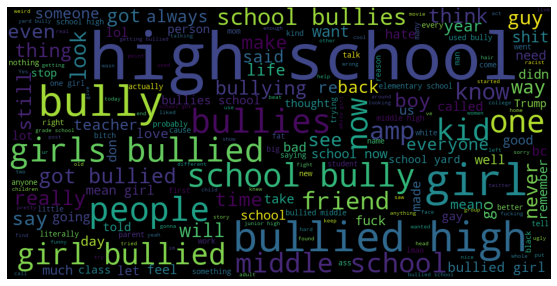

In [51]:
#EDA for the age

age = data[data['cyberbullying_type']=='age']
text_age = age.tweet_text.values
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(text_age))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

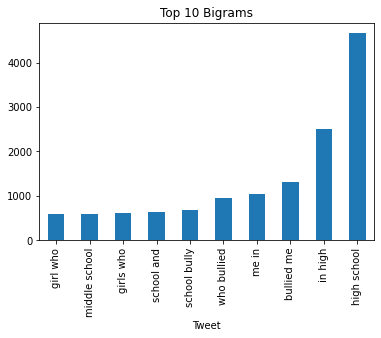

In [46]:
bigrams = top_n_gram(text_age,(2,2),10)

age2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
age2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

(-0.5, 999.5, 499.5, -0.5)

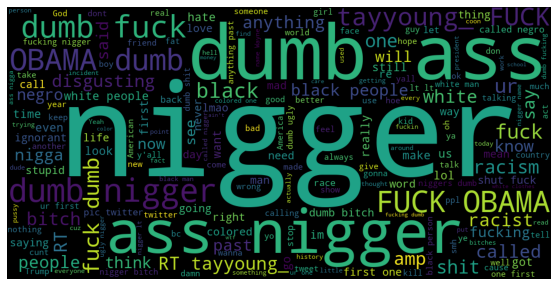

In [42]:
#EDA for 'ethnicity'
ethnicity = data[data['cyberbullying_type']=='ethnicity']
text_ethnicity = ethnicity.tweet_text.values
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(text_ethnicity))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

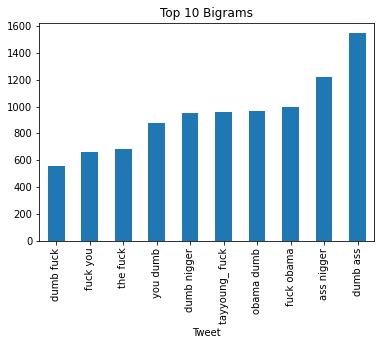

In [47]:
bigrams = top_n_gram(text_ethnicity,(2,2),10)

ethnicity2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
ethnicity2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

(-0.5, 999.5, 499.5, -0.5)

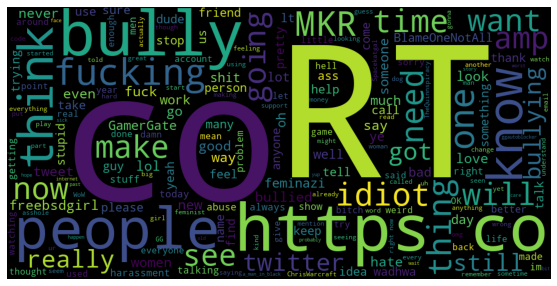

In [52]:
#EDA for 'other_cyberbullying'
other_cyber = data[data['cyberbullying_type']=='other_cyberbullying']
text_other_cyber = other_cyber.tweet_text.values
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(text_other_cyber))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

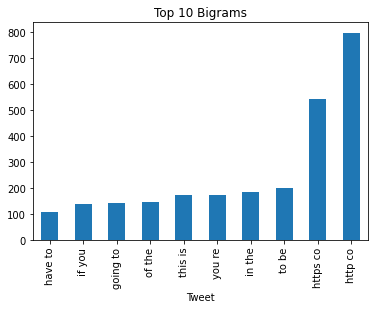

In [53]:
bigrams = top_n_gram(text_other_cyber,(2,2),10)

ethnicity2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
ethnicity2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

#Feature Extraction
Different techniques can be used here like TF-IDF, Word2vec (Skipgram Model), CBOW, Hugging face etc.

In [54]:
#Label Encoding the target variable
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
cyberbullying_type = ('not_cyberbullying', 'gender', 'religion', 'other_cyberbullying','age', 'ethnicity')
cyberbullying_df = pd.DataFrame(cyberbullying_type, columns=['cyberbullying_type'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(cyberbullying_df['cyberbullying_type'])
bridge_df

TypeError: ignored

In [55]:
data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

#Model Fitting 
In this section, we will fit all the ensemble models. Eg: RF, Adaboost, Xgboost, Catboost, Gradient Boosted Trees.

#Evaluation of models

#Conclusion